In [62]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import statsmodels.regression.linear_model
from utils.imdbmovie import get_movies
import statsmodels.tools
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import tikzplotlib
from collections import Counter, defaultdict

In [3]:
df = pd.read_csv('data/analysis_data/imdb_frequency.csv', index_col=0)

In [4]:
df.shape

(135998, 563)

In [5]:
df

,year,kind_movie,kind_tv_series,kind_episode,kind_tv_short,kind_tv_mini_series,kind_tv_movie,kind_video_movie,kind_video_game,genre_Western,...,watcher,medical officer,border patrol,state trooper,gold digger,department head,chamberlain,cinematographer,chief executive,sketch artist
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.657400e+04,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.808900e+04,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.028400e+04,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.030000e+04,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.columns.values

array(['imdb_ID', 'year', 'kind_movie', 'kind_tv_series', 'kind_episode',
       'kind_tv_short', 'kind_tv_mini_series', 'kind_tv_movie',
       'kind_video_movie', 'kind_video_game', 'genre_Western',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Short',
       'genre_Reality_TV', 'genre_Adult', 'genre_Sci_Fi',
       'genre_Adventure', 'genre_Music', 'genre_Family',
       'genre_Game_Show', 'genre_History', 'genre_Talk_Show',
       'genre_Action', 'genre_Horror', 'genre_News', 'genre_War',
       'genre_Sport', 'genre_Fantasy', 'genre_Documentary',
       'genre_Biography', 'genre_Thriller', 'genre_Mystery',
       'genre_Drama', 'genre_Musical', 'genre_Romance', 'genre_Film_Noir',
       'country_United_States', 'country_United_Kingdom',
       'country_Canada', 'country_France', 'country_Japan',
       'country_Italy', 'country_Germany', 'country_India',
       'country_Hong_Kong', 'country_Spain', 'country_South_Korea',
       'country_Australia', 'country_Swede

In [6]:
ind_cols = df.columns[:-500]
dep_cols = df.columns[-500:]

In [7]:
ind_cols

Index(['year', 'kind_movie', 'kind_tv_series', 'kind_episode', 'kind_tv_short',
       'kind_tv_mini_series', 'kind_tv_movie', 'kind_video_movie',
       'kind_video_game', 'genre_Western', 'genre_Animation', 'genre_Comedy',
       'genre_Crime', 'genre_Short', 'genre_Reality_TV', 'genre_Adult',
       'genre_Sci_Fi', 'genre_Adventure', 'genre_Music', 'genre_Family',
       'genre_Game_Show', 'genre_History', 'genre_Talk_Show', 'genre_Action',
       'genre_Horror', 'genre_News', 'genre_War', 'genre_Sport',
       'genre_Fantasy', 'genre_Documentary', 'genre_Biography',
       'genre_Thriller', 'genre_Mystery', 'genre_Drama', 'genre_Musical',
       'genre_Romance', 'genre_Film_Noir', 'country_United_States',
       'country_United_Kingdom', 'country_Canada', 'country_France',
       'country_Japan', 'country_Italy', 'country_Germany', 'country_India',
       'country_Hong_Kong', 'country_Spain', 'country_South_Korea',
       'country_Australia', 'country_Sweden', 'country_Denmark',
  

In [14]:
for x in df.isna().sum(axis=0):
    print(x)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
130254
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

In [15]:
df.isna().sum().idxmax()

'box_office_in_dollars'

In [17]:
df.box_office_in_dollars.isna().sum()/df.shape[0]

0.9577640847659524

In [18]:
imdb_df = pd.read_csv('data/imdb/imdb.ngram.box_office.csv', index_col=None)

In [19]:
imdb_df.columns

Index(['year', 'imdb_ID', 'xml_ID', 'n_sentences', 'n_words',
       'n_sentences_title', 'imdb_year', 'imdb_genres', 'imdb_countries',
       'imdb_kind', 'imdb_languages', 'imdb_title', 'first_imdb_country',
       'first_imdb_language', '1_gram_count', '2_gram_count', '3_gram_count',
       '4_gram_count', '5_gram_count', 'box_office_in_dollars'],
      dtype='object')

In [20]:
imdb_df.box_office_in_dollars.isna().sum()

130251

In [22]:
for _, row in imdb_df.loc[(imdb_df.year == 2017) & (imdb_df.box_office_in_dollars.isna()), ['imdb_ID','year','imdb_title']].iterrows():
    print(row.imdb_ID, row.imdb_title)

331314 Bunyan and Babe
339736 The Evil Within
1024855 London Heist
1131724 2:22
1293847 xXx: Return of Xander Cage
1386691 Shimmer Lake
1469304 Baywatch
1536537 What Happened to Monday
1544608 Voice from the Stone
1615160 The Foreigner
1730768 The Zookeeper's Wife
1933667 The Wizard of Lies
1935089 Blind
1972591 King Arthur: Legend of the Sword
2024521 My Name Is Lenny
2039380 Star Raiders: The Adventures of Saber Raine
2090465 Black Butterfly
2122355 Hickey
2184233 1 Mile to You
2312184 All About the Money
2337841 Bottom of the World
2382622 After the Wedding
2417712 Goon: Last of the Enforcers
2429278 The Ghost and The Whale
2449638 Atomica
2487028 Walk of Fame
2494376 Justice League Dark
2516500 Granny of the Dead
2523096 Needlestick
2556676 Blowtorch
2569088 The Saint
2582576 Sand Castle
2597760 The Outcasts
2658538 Austin Found
2674358 The Hunter's Prayer
2763304 T2 Trainspotting
2827058 Mississippi Murder
2852500 The Bigfoot Project
2920294 Cigarette Soup
2923834 The Last Scout
2

In [24]:
imdb_dict = get_movies(imdb_df["imdb_ID"].values, verbose=True)

Getting IMDb data...: 100%|██████████| 135998/135998 [13:04<00:00, 173.45it/s] 


In [28]:
imdb_df.index = imdb_df.imdb_ID

In [32]:
n = 0
for imdb in imdb_df.index[-500:]:
    kind = imdb_df.loc[imdb, 'imdb_kind']
    year = imdb_df.loc[imdb, 'year']
    imdb = str(int(imdb)).zfill(7)
    try:
        bo = imdb_dict[imdb]['box office']
        print(f'tt{imdb:15s} {kind} {year:4d} {bo}')
    except Exception:
        n += 1
        print(f'tt{imdb:15s} {kind} {year:4d} ERROR')

tt1996307147      nan 2008 ERROR
tt1996307160      nan 2012 ERROR
tt1996307173      nan 2009 ERROR
tt1996307174      nan 2012 ERROR
tt1996307178      nan 2012 ERROR
tt1996307180      nan 2002 ERROR
tt1996307205      nan 2006 ERROR
tt1996307224      nan 2012 ERROR
tt1996307225      nan 1983 ERROR
tt1996307226      nan 2011 ERROR
tt1996307227      nan 1966 ERROR
tt1996307248      nan 1954 ERROR
tt1996307250      nan 2004 ERROR
tt1996307260      nan 2012 ERROR
tt1996307310      nan 2012 ERROR
tt1996307324      nan 2012 ERROR
tt1996307333      nan 2011 ERROR
tt1996307351      nan 2009 ERROR
tt1996307363      nan 2004 ERROR
tt1996307365      nan 2006 ERROR
tt1996307373      nan 1992 ERROR
tt1996307375      nan 2009 ERROR
tt1996307384      nan 2001 ERROR
tt1996307397      nan 2011 ERROR
tt1996307417      nan 2008 ERROR
tt1996307424      nan 1990 ERROR
tt1996307435      nan 2012 ERROR
tt1996307436      nan 2012 ERROR
tt1996307454      nan 2013 ERROR
tt1996307461      nan 2013 ERROR
tt19963074

In [33]:
df = df.drop(columns=['box_office_in_dollars'])

In [34]:
df.head()

,year,kind_movie,kind_tv_series,kind_episode,kind_tv_short,kind_tv_mini_series,kind_tv_movie,kind_video_movie,kind_video_game,genre_Western,...,watcher,medical officer,border patrol,state trooper,gold digger,department head,chamberlain,cinematographer,chief executive,sketch artist
imdb_ID,,,,,,,,,,,,,,,,,,,,,
35423.0,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36574.0,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38089.0,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40284.0,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40300.0,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.isna().sum().max()

5

In [37]:
df.dropna().shape

(135988, 562)

In [38]:
df.shape

(135998, 562)

In [39]:
df = df.dropna()

In [40]:
df.isna().sum().sum()

0

In [42]:
df.iloc[:,:-500]

,year,kind_movie,kind_tv_series,kind_episode,kind_tv_short,kind_tv_mini_series,kind_tv_movie,kind_video_movie,kind_video_game,genre_Western,...,country_Mexico,country_Belgium,country_China,country_Netherlands,country_Norway,country_Poland,country_Brazil,country_Argentina,country_Soviet_Union,country_Thailand
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.657400e+04,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.808900e+04,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.028400e+04,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.030000e+04,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.iloc[:,-500:]

,doctor,police,captain,cop,officer,president,detective,teacher,lawyer,soldier,...,watcher,medical officer,border patrol,state trooper,gold digger,department head,chamberlain,cinematographer,chief executive,sketch artist
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,0.000000,0.000000,0.000000,0.0,0.000000,0.000181,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.657400e+04,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.808900e+04,0.000000,0.000000,0.000772,0.0,0.000386,0.000000,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.028400e+04,0.000000,0.000363,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.030000e+04,0.000472,0.000945,0.000787,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,0.003358,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00056,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,0.000000,0.000000,0.000132,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X = df.iloc[:,:-500]
y = df['doctor']

In [49]:
X = statsmodels.tools.add_constant(X)

In [51]:
ols = statsmodels.regression.linear_model.OLS(y, X)

In [52]:
result = ols.fit()

In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 doctor   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     31.27
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:09:49   Log-Likelihood:             7.4691e+05
No. Observations:              135988   AIC:                        -1.494e+06
Df Residuals:                  135925   BIC:                        -1.493e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0168      0.000     43.268      0.000       0.016       0.018
year                   -8.177e-06   1.93e-07    -42.457      0.000   -8.55e-06    -7.8e-06
kind_movie             -6.793e-05   3.51e-05     -1.935      0.053      -0.000    8.79e-07
kind_tv_series          -6.73e-05   4.31e-05     -1.561      0.118      -0.000    1.72e-05
kind_episode           -2.752e-05   3.48e-05     -0.791      0.429   -9.57e-05    4.07e-05
kind_tv_short          -5.888e-05   7.48e-05     -0.787      0.431      -0.000    8.78e-05
kind_tv_mini_series    -6.505e-05   5.41e-05     -1.203      0.229      -0.000    4.09e-05
kind_tv_movie          -2.251e-05   3.95e-05     -0.569      0.569      -0.000     5.5e-05
kind_video_movie        -2.53e-06   4.16e-05     -0.061      0.952   -8.41e-05    7.91e-05
kind_video_game            0.0002      0.000      2.157      0.031    2.09e-05       0.000
genre_Western          -7.829e-05   2.44e-05     -3.203      0.001      -0.000   -3.04e-05
genre_Animation         2.014e-05   1.14e-05      1.760      0.078   -2.28e-06    4.26e-05
genre_Comedy            3.072e-05   7.03e-06      4.372      0.000     1.7e-05    4.45e-05
genre_Crime              1.59e-06   8.65e-06      0.184      0.854   -1.54e-05    1.86e-05
genre_Short             2.146e-05   1.98e-05      1.086      0.278   -1.73e-05    6.02e-05
genre_Reality_TV       -2.585e-05    2.7e-05     -0.959      0.338   -7.87e-05     2.7e-05
genre_Adult             1.363e-05   7.08e-05      0.193      0.847      -0.000       0.000
genre_Sci_Fi           -9.478e-06   9.49e-06     -0.999      0.318   -2.81e-05    9.13e-06
genre_Adventure        -1.663e-05   9.95e-06     -1.672      0.095   -3.61e-05    2.87e-06
genre_Music            -8.413e-06   1.81e-05     -0.464      0.643    -4.4e-05    2.71e-05
genre_Family           -8.359e-06   1.04e-05     -0.801      0.423   -2.88e-05    1.21e-05
genre_Game_Show          8.37e-05   3.36e-05      2.489      0.013    1.78e-05       0.000
genre_History           1.544e-05    1.6e-05      0.964      0.335   -1.59e-05    4.68e-05
genre_Talk_Show            0.0001   5.51e-05      2.624      0.009    3.66e-05       0.000
genre_Action            1.187e-05    8.5e-06      1.397      0.163   -4.79e-06    2.85e-05
genre_Horror             2.02e-05   1.14e-05      1.768      0.077    -2.2e-06    4.26e-05
genre_News             -6.346e-06   5.12e-05     -0.124      0.901      -0.000    9.39e-05
genre_War              -2.719e-05    1.7e-05     -1.602      0.109   -6.05e-05    6.08e-06
genre_Sport                0.0001   2.48e-05      4.248      0.000    5.67e-05       0.000
genre_Fantasy          -6.311e-06   9.51e-06     -0.664      0.507   -2.49e-05    1.23e-05
genre_Documentary       2.606e-05   1.41e-05      1.853      0.064   -1.51e-06  

In [56]:
ols_arr = []
results_arr = []
professions = []

for i in trange(500):
    professions.append(df.columns[-500 + i])
    X = df.iloc[:,:-500]
    X = statsmodels.tools.add_constant(X)
    Y = df.iloc[:,-500 + i]
    ols = statsmodels.regression.linear_model.OLS(Y, X)
    res = ols.fit()
    ols_arr.append(ols)
    results_arr.append(res)

100%|██████████| 500/500 [34:32<00:00,  4.15s/it]


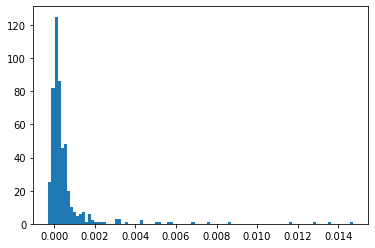

In [59]:
r2adj_arr = []

for result in results_arr:
    r2adj_arr.append(result.rsquared_adj)
    
plt.hist(r2adj_arr, bins=100)
plt.show()

In [60]:
min(r2adj_arr)

-0.0002929344949795798

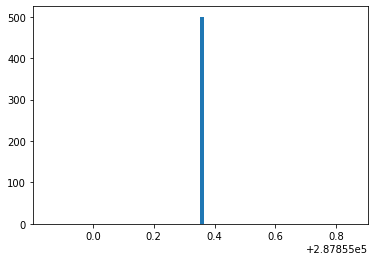

In [61]:
cn_arr = []

for result in results_arr:
    cn_arr.append(result.condition_number)
    
plt.hist(cn_arr, bins=100)
plt.show()

In [63]:
len(set(cn_arr))

1

In [64]:
cn_arr[0]

287855.3539126951

In [65]:
X

,const,year,kind_movie,kind_tv_series,kind_episode,kind_tv_short,kind_tv_mini_series,kind_tv_movie,kind_video_movie,kind_video_game,...,country_Mexico,country_Belgium,country_China,country_Netherlands,country_Norway,country_Poland,country_Brazil,country_Argentina,country_Soviet_Union,country_Thailand
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,1.0,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.657400e+04,1.0,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.808900e+04,1.0,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.028400e+04,1.0,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.030000e+04,1.0,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
corr = X.corr()

In [70]:
corr

,const,year,kind_movie,kind_tv_series,kind_episode,kind_tv_short,kind_tv_mini_series,kind_tv_movie,kind_video_movie,kind_video_game,...,country_Mexico,country_Belgium,country_China,country_Netherlands,country_Norway,country_Poland,country_Brazil,country_Argentina,country_Soviet_Union,country_Thailand
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,1.000000,-0.214180,0.000775,0.207410,-0.016978,-0.009424,-0.005152,-0.007523,-0.006630,...,-0.023962,0.013419,0.015308,-0.007778,0.009556,-0.021860,-0.012937,-0.009891,-0.071782,0.008709
kind_movie,NaN,-0.214180,1.000000,-0.074740,-0.876863,-0.029456,-0.045374,-0.099352,-0.083658,-0.018600,...,0.075745,0.096753,0.097175,0.087176,0.055783,0.081528,0.087081,0.082147,0.076716,0.083325
kind_tv_series,NaN,0.000775,-0.074740,1.000000,-0.138003,-0.004636,-0.007141,-0.015636,-0.013166,-0.002927,...,-0.004080,-0.000769,0.005672,-0.002165,0.002178,-0.005040,-0.002789,0.001951,-0.006674,-0.002912
kind_episode,NaN,0.207410,-0.876863,-0.138003,1.000000,-0.054388,-0.083780,-0.183448,-0.154470,-0.034345,...,-0.067683,-0.089300,-0.089706,-0.086231,-0.052607,-0.079549,-0.077868,-0.077067,-0.076078,-0.075175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_Poland,NaN,-0.021860,0.081528,-0.005040,-0.079549,0.031394,0.004231,0.004823,-0.007048,0.002387,...,-0.003706,0.002598,-0.000414,-0.000106,0.005857,1.000000,-0.002530,-0.000548,0.016096,-0.003887
country_Brazil,NaN,-0.012937,0.087081,-0.002789,-0.077868,-0.002773,-0.002536,-0.008548,-0.005022,-0.001751,...,0.006627,-0.003337,0.001243,0.004756,-0.004297,-0.002530,1.000000,0.043197,-0.003992,-0.001900
country_Argentina,NaN,-0.009891,0.082147,0.001951,-0.077067,-0.002686,-0.000554,-0.006565,0.003172,-0.001696,...,0.023772,0.000016,-0.003136,0.037761,-0.002381,-0.000548,0.043197,1.000000,-0.003867,-0.003713
country_Soviet_Union,NaN,-0.071782,0.076716,-0.006674,-0.076078,0.017050,0.012416,0.010662,-0.006468,-0.001661,...,-0.004816,-0.004613,-0.004613,-0.004464,-0.002257,0.016096,-0.003992,-0.003867,1.000000,-0.003636


In [83]:
var_arr = corr.columns
correlations = []

for i in range(len(var_arr)):
    for j in range(i + 1, len(var_arr)):
        c = corr.iloc[i, j]
        if pd.notna(c):
            correlations.append((var_arr[i], var_arr[j], c))

In [84]:
correlations = sorted(correlations, key=lambda x: x[2])

In [86]:
correlations[-5:]

[('genre_Adventure', 'genre_Action', 0.4115044172973941),
 ('genre_Thriller', 'genre_Mystery', 0.4342033846929636),
 ('genre_Sci_Fi', 'genre_Adventure', 0.45809654972527863),
 ('genre_Crime', 'genre_Mystery', 0.4747440691049011),
 ('genre_Reality_TV', 'genre_Game_Show', 0.5933967432002594)]

In [87]:
correlations[:5]

[('kind_movie', 'kind_episode', -0.8768634155511745),
 ('genre_Comedy', 'genre_Drama', -0.323378375996643),
 ('genre_Comedy', 'genre_Thriller', -0.2814381059301323),
 ('genre_Documentary', 'genre_Drama', -0.25240967650013824),
 ('kind_episode', 'country_France', -0.2463107418042242)]

In [88]:
X.columns

Index(['const', 'year', 'kind_movie', 'kind_tv_series', 'kind_episode',
       'kind_tv_short', 'kind_tv_mini_series', 'kind_tv_movie',
       'kind_video_movie', 'kind_video_game', 'genre_Western',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Short',
       'genre_Reality_TV', 'genre_Adult', 'genre_Sci_Fi', 'genre_Adventure',
       'genre_Music', 'genre_Family', 'genre_Game_Show', 'genre_History',
       'genre_Talk_Show', 'genre_Action', 'genre_Horror', 'genre_News',
       'genre_War', 'genre_Sport', 'genre_Fantasy', 'genre_Documentary',
       'genre_Biography', 'genre_Thriller', 'genre_Mystery', 'genre_Drama',
       'genre_Musical', 'genre_Romance', 'genre_Film_Noir',
       'country_United_States', 'country_United_Kingdom', 'country_Canada',
       'country_France', 'country_Japan', 'country_Italy', 'country_Germany',
       'country_India', 'country_Hong_Kong', 'country_Spain',
       'country_South_Korea', 'country_Australia', 'country_Sweden',
       'coun

In [94]:
X[['kind_tv_series','kind_tv_short','kind_tv_mini_series','kind_tv_movie','kind_video_movie','kind_video_game']].sum(axis=1).sum()/135998

0.053375784938013794

In [95]:
kind_movie_or_tv = []
kind_other = []

for _, row in X.iterrows():
    if row.kind_movie:
        kind_movie_or_tv.append(0)
        kind_other.append(0)
    elif row.kind_episode:
        kind_movie_or_tv.append(1)
        kind_other.append(0)
    else:
        kind_movie_or_tv.append(0)
        kind_other.append(1)
        
X_new = X.drop(columns=['kind_movie', 'kind_tv_series', 'kind_episode', 'kind_tv_short', 'kind_tv_mini_series', 'kind_tv_movie', 'kind_video_movie', 'kind_video_game']).copy()
X_new['kind_movie_or_tv'] = kind_movie_or_tv
X_new['kind_other'] = kind_other

In [96]:
X_new

,const,year,genre_Western,genre_Animation,genre_Comedy,genre_Crime,genre_Short,genre_Reality_TV,genre_Adult,genre_Sci_Fi,...,country_China,country_Netherlands,country_Norway,country_Poland,country_Brazil,country_Argentina,country_Soviet_Union,country_Thailand,kind_movie_or_tv,kind_other
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,1.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3.657400e+04,1.0,1965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3.808900e+04,1.0,1954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4.028400e+04,1.0,1950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4.030000e+04,1.0,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2.140040e+09,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [97]:
np.linalg.cond(X)

287855.3539126954

In [98]:
np.linalg.cond(X_new)

285354.8268398067

In [99]:
correlations[-20:]

[('country_Sweden', 'country_Denmark', 0.23958771343255508),
 ('genre_Mystery', 'genre_Drama', 0.2396711910013822),
 ('genre_Animation', 'genre_Sci_Fi', 0.2468308004722786),
 ('country_France', 'country_Italy', 0.25294991524650146),
 ('genre_Crime', 'genre_Drama', 0.2547828853492106),
 ('kind_movie', 'country_France', 0.25907218115763253),
 ('genre_History', 'genre_War', 0.2652872999753545),
 ('genre_History', 'genre_Biography', 0.2788736875611434),
 ('kind_tv_short', 'genre_Short', 0.28115767533867786),
 ('genre_Adventure', 'genre_Fantasy', 0.29062609899954206),
 ('genre_Animation', 'genre_Family', 0.3198540989954579),
 ('genre_Adventure', 'genre_Family', 0.3331520769858712),
 ('genre_Animation', 'genre_Adventure', 0.33455990137280844),
 ('genre_Sci_Fi', 'genre_Action', 0.35969781885600577),
 ('genre_Crime', 'genre_Thriller', 0.39613396427983),
 ('genre_Adventure', 'genre_Action', 0.4115044172973941),
 ('genre_Thriller', 'genre_Mystery', 0.4342033846929636),
 ('genre_Sci_Fi', 'genre_A

In [114]:
correlations[:50]

[('kind_movie', 'kind_episode', -0.8768634155511745),
 ('genre_Comedy', 'genre_Drama', -0.323378375996643),
 ('genre_Comedy', 'genre_Thriller', -0.2814381059301323),
 ('genre_Documentary', 'genre_Drama', -0.25240967650013824),
 ('kind_episode', 'country_France', -0.2463107418042242),
 ('year', 'kind_movie', -0.21417965028220168),
 ('genre_Comedy', 'genre_Mystery', -0.2117274626046834),
 ('kind_movie', 'genre_Mystery', -0.1922206508006632),
 ('genre_Comedy', 'genre_Crime', -0.1844909697037709),
 ('kind_episode', 'kind_tv_movie', -0.18344795657480673),
 ('kind_episode', 'country_Italy', -0.18292002806048022),
 ('genre_Animation', 'genre_Drama', -0.18125666536527657),
 ('kind_episode', 'country_Japan', -0.17804826888434416),
 ('kind_episode', 'country_India', -0.17768383081891984),
 ('genre_Comedy', 'genre_Documentary', -0.16119606823221763),
 ('country_United_States', 'country_United_Kingdom', -0.1581937860392558),
 ('kind_movie', 'genre_Sci_Fi', -0.15570721089825745),
 ('kind_episode', 

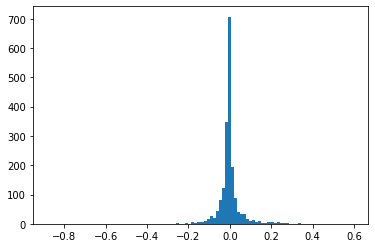

In [113]:
correlation_values = [z[2] for z in correlations]
plt.hist(correlation_values, bins=100)
plt.show()

In [100]:
def find_condition_number(_df, remove_cols):
    _df = _df.drop(columns=remove_cols).copy()
    print(np.linalg.cond(_df))

In [101]:
find_condition_number(X_new, ['genre_Game_Show'])

285354.71469890786


In [115]:
X_new.to_csv('data/analysis_data/X.csv', index=True)

In [106]:
Y = df.iloc[:,-500:].copy()

In [108]:
Y.to_csv('data/analysis_data/Y.csv', index=True)

In [109]:
genre_cols = [col for col in X_new.columns if col.startswith('genre_')]
country_cols = [col for col in X_new.columns if col.startswith('country_')]

In [110]:
len(genre_cols), len(country_cols)

(28, 25)

In [111]:
find_condition_number(X_new, genre_cols)

277509.2065206521


In [112]:
find_condition_number(X_new, genre_cols + country_cols)

271604.1787923503


In [116]:
X.columns

Index(['const', 'year', 'kind_movie', 'kind_tv_series', 'kind_episode',
       'kind_tv_short', 'kind_tv_mini_series', 'kind_tv_movie',
       'kind_video_movie', 'kind_video_game', 'genre_Western',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Short',
       'genre_Reality_TV', 'genre_Adult', 'genre_Sci_Fi', 'genre_Adventure',
       'genre_Music', 'genre_Family', 'genre_Game_Show', 'genre_History',
       'genre_Talk_Show', 'genre_Action', 'genre_Horror', 'genre_News',
       'genre_War', 'genre_Sport', 'genre_Fantasy', 'genre_Documentary',
       'genre_Biography', 'genre_Thriller', 'genre_Mystery', 'genre_Drama',
       'genre_Musical', 'genre_Romance', 'genre_Film_Noir',
       'country_United_States', 'country_United_Kingdom', 'country_Canada',
       'country_France', 'country_Japan', 'country_Italy', 'country_Germany',
       'country_India', 'country_Hong_Kong', 'country_Spain',
       'country_South_Korea', 'country_Australia', 'country_Sweden',
       'coun

In [117]:
X['kind_other'] = X[['kind_tv_series','kind_tv_short','kind_tv_mini_series','kind_tv_movie','kind_video_movie','kind_video_game']].sum(axis=1)

In [119]:
X['kind_other'].sum()

7259.0

In [120]:
X_new = X.drop(columns=['kind_tv_series','kind_tv_short','kind_tv_mini_series','kind_tv_movie','kind_video_movie','kind_video_game']).copy()

In [121]:
X_new

,const,year,kind_movie,kind_episode,genre_Western,genre_Animation,genre_Comedy,genre_Crime,genre_Short,genre_Reality_TV,...,country_Belgium,country_China,country_Netherlands,country_Norway,country_Poland,country_Brazil,country_Argentina,country_Soviet_Union,country_Thailand,kind_other
imdb_ID,,,,,,,,,,,,,,,,,,,,,
3.542300e+04,1.0,2001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.657400e+04,1.0,1965.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.808900e+04,1.0,1954.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.028400e+04,1.0,1950.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.030000e+04,1.0,1950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,1.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.140040e+09,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
find_condition_number(X_new, [])

287731.23979212076


In [124]:
X_new.to_csv('data/analysis_data/X.csv', index=True)